# Retention Model

###### The learning goals of this notebook are:

    Load a CSV file into an Apache® Spark DataFrame.
    Explore data.
    Prepare data for training and evaluation.
    Create an Apache® Spark machine learning pipeline.
    Train and evaluate a model.
    Persist a pipeline and model in Watson Machine Learning repository.
    Deploy a model for online scoring using Wastson Machine Learning API.
    Score sample scoring data using the Watson Machine Learning API.
    Explore and visualize prediction result using the plotly package.


###### Load Libraries

Run the following cell to import required libraries

In [35]:
# The code was removed by DSX for sharing.

In [2]:


body = client_3ee96d0a6d9a4b428f2e5378e7bec329.get_object(Bucket='inschurn-donotdelete-pr-fwv2tei0p8mnfd',Key='churn-set1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

customers= pd.read_csv(body)
customers.head()

,ZIP5,LATITUDE,LONGITUDE,ADDRESS_ID,INDIVIDUAL_ID,INCOME,AGE_IN_YEARS,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,...,CREDIT_RATING,HOME_OWNER,NO_MARITAL_STATUS,COLLEGE_DEGREE,GOOD_CREDIT,ACCT_SUSPD_DATE,CURR_ANN_AMT,CUST_TENURE,CANCEL,NOOFPRODUCTS
0,75001.0,32.944027,-96.850765,5.213006e+11,2.213016e+11,125000.0,42.053388,0.0,1.000000,Single,...,800+,0,0,1,1,NaN,862.963714,7.242300,N,2
1,75001.0,32.944027,-96.850765,5.213006e+11,2.213016e+11,87500.0,31.805613,0.0,2.000000,Married,...,800+,0,0,1,1,NaN,1007.883812,6.251951,N,2
2,75001.0,32.944027,-96.850765,5.213006e+11,2.213016e+11,87500.0,43.890486,1.0,6.000000,Married,...,800+,0,0,1,1,NaN,986.928695,10.391239,N,2
3,75001.0,32.944027,-96.850765,5.213006e+11,2.213016e+11,87500.0,71.052704,0.0,7.000000,Single,...,800+,0,0,1,1,NaN,1025.382552,10.628063,N,2
4,75001.0,32.944027,-96.850765,5.213006e+11,2.213016e+11,87500.0,38.724162,0.0,6.800524,NaN,...,800+,0,0,0,1,NaN,1011.281898,15.608830,N,2


In [3]:
#merge3.CANCEL.replace(['Y','N'],[1,0],inplace=True)
#merge3.head()

In [4]:
customers.AGE_IN_YEARS=customers.AGE_IN_YEARS.astype(int)
customers.HAS_CHILDREN=customers.HAS_CHILDREN.astype(int)
customers.INCOME=customers.INCOME.astype(int)
customers=customers.drop('CURR_ANN_AMT',1)

In [5]:
customers.head(2)

,ZIP5,LATITUDE,LONGITUDE,ADDRESS_ID,INDIVIDUAL_ID,INCOME,AGE_IN_YEARS,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,...,HOME_MARKET_VALUE,CREDIT_RATING,HOME_OWNER,NO_MARITAL_STATUS,COLLEGE_DEGREE,GOOD_CREDIT,ACCT_SUSPD_DATE,CUST_TENURE,CANCEL,NOOFPRODUCTS
0,75001.0,32.944027,-96.850765,5.213006e+11,2.213016e+11,125000,42,0,1.0,Single,...,275000 - 299999,800+,0,0,1,1,NaN,7.242300,N,2
1,75001.0,32.944027,-96.850765,5.213006e+11,2.213016e+11,87500,31,0,2.0,Married,...,200000 - 224999,800+,0,0,1,1,NaN,6.251951,N,2


In [6]:
customers_group_by_maritalstatus=customers.groupby('MARITAL_STATUS')
print (customers_group_by_maritalstatus['MARITAL_STATUS'].count())

MARITAL_STATUS
Married    31788
Single     17742
Name: MARITAL_STATUS, dtype: int64


In [7]:
# Married people have cancelled
#merge3.head(20)
#merge3.loc[(merge3['HOME_OWNER']==1) & (merge3['CANCEL']==0)]

#df[df['first_name'].notnull() & (df['nationality'] == "USA")]

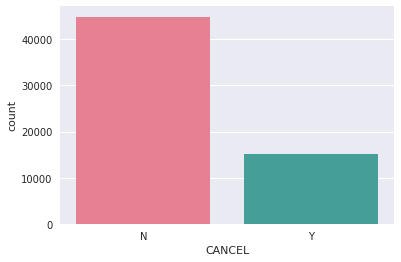

In [8]:


# load matplot lib for various plotting

plt.rc("font", size=14)


sns.set()
# vISULAIZATION OF NO ON CANCELLATIONS

sns.countplot(x='CANCEL', data=customers, palette='husl')
plt.show()

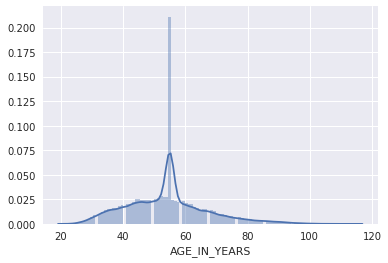

In [9]:
sns.distplot(customers.AGE_IN_YEARS, bins=100)

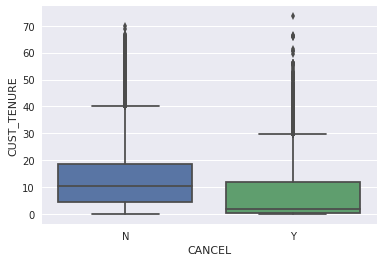

In [10]:
sns.boxplot(x="CANCEL", y="CUST_TENURE", data=customers)

In [11]:
GROUP_PDTS_CANCEL=customers.groupby(['CANCEL','NOOFPRODUCTS']).count()
GROUP_PDTS_CANCEL

ZIP5  LATITUDE  LONGITUDE  ADDRESS_ID  INDIVIDUAL_ID  \
CANCEL NOOFPRODUCTS                                                          
N      1             35923     33414      33414       35923          35923   
       2              4471      4148       4148        4471           4471   
       3              4511      4218       4218        4511           4511   
Y      1             10484      9737       9737       10484          10484   
       2              2308      2141       2141        2308           2308   
       3              1242      1133       1133        1242           1242   
       4               996       929        929         996            996   

                     INCOME  AGE_IN_YEARS  HAS_CHILDREN  LENGTH_OF_RESIDENCE  \
CANCEL NOOFPRODUCTS                                                            
N      1              35923         35923         35923                35923   
       2               4471          4471          4471                 4471   
       3               4511          4511          4511                 4511   
Y      1              10484         10484         10484                10484   
       2               2308          2308          2308                 2308   
       3               1242          1242          1242                 1242   
       4                996           996           996                  996   

                     MARITAL_STATUS     ...       NUMBER_OF_CHILDREN  \
CANCEL NOOFPRODUCTS                     ...                            
N      1                      29848     ...                    23005   
       2                       3743     ...                     2901   
       3                       3765     ...                     2867   
Y      1                       8495     ...                     6677   
       2                       1860     ...                     1459   
       3                       1005     ...                      777   
       4                        814     ...                      652   

                     EDUCATION  HOME_MARKET_VALUE  CREDIT_RATING  HOME_OWNER  \
CANCEL NOOFPRODUCTS                                                            
N      1                 20763              33087          34483       35923   
       2                  2639               4121           4297        4471   
       3                  2631               4137           4316        4511   
Y      1                  5816               9422           9946       10484   
       2                  1261               2077           2182        2308   
       3                   686               1108           1177        1242   
       4                   557                903            946         996   

                     NO_MARITAL_STATUS  COLLEGE_DEGREE  GOOD_CREDIT  \
CANCEL NOOFPRODUCTS                                                   
N      1                         35923           35923        35923   
       2                          4471            4471         4471   
       3                          4511            4511         4511   
Y      1                         10484           10484        10484   
       2                          2308            2308         2308   
       3                          1242            1242         1242   
       4                           996             996          996   

                     ACCT_SUSPD_DATE  CUST_TENURE  
CANCEL NOOFPRODUCTS                                
N      1                           0        35923  
       2                           0         4471  
       3                           0         4511  
Y      1                       10484        10484  
       2                        2308         2308  
       3                        1242         1242  
       4                         996          996  

[7 rows x 21 columns]

In [12]:
customers.groupby('CANCEL').mean()

,ZIP5,LATITUDE,LONGITUDE,ADDRESS_ID,INDIVIDUAL_ID,INCOME,AGE_IN_YEARS,HAS_CHILDREN,LENGTH_OF_RESIDENCE,NUMBER_OF_CHILDREN,HOME_OWNER,NO_MARITAL_STATUS,COLLEGE_DEGREE,GOOD_CREDIT,CUST_TENURE,NOOFPRODUCTS
CANCEL,,,,,,,,,,,,,,,,
N,75003.951609,33.028911,-96.773532,5.213005e+11,2.213014e+11,88668.795635,54.589066,0.442000,6.957544,0.932610,0.745975,0.0,0.344416,0.948959,12.887059,1.300479
Y,75011.571790,33.038421,-96.825192,5.213006e+11,2.213016e+11,101679.264671,52.538723,0.466134,6.234045,1.017355,0.720492,0.0,0.333599,0.939055,7.342869,1.517631


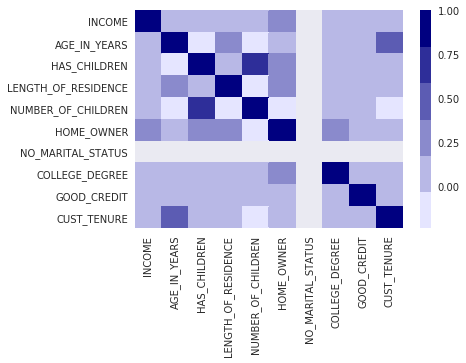

In [13]:
# Find the corelation between inputs

num_cols=['INCOME','AGE_IN_YEARS','HAS_CHILDREN','LENGTH_OF_RESIDENCE','NUMBER_OF_CHILDREN','HOME_OWNER','NO_MARITAL_STATUS','COLLEGE_DEGREE','GOOD_CREDIT','CUST_TENURE']

num_cols_with_y = num_cols + ['CANCEL']

corr = customers[num_cols].corr()

# plot heatmap
sns.heatmap(corr, 
            xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            cmap=sns.light_palette("navy"),
           )
plt.show()


In [14]:


# Prepare data

mySchema = StructType([ StructField("ZIP5", FloatType(), True)\
                       ,StructField("LATITUDE", FloatType(), True)\
                       ,StructField("LONGITUDE", FloatType(), True)\
                       ,StructField("ADDRESS_ID", FloatType(), True)\
                       ,StructField("INDIVIDUAL_ID", FloatType(), True)\
                       ,StructField("INCOME", IntegerType(), True)\
                       ,StructField("AGE_IN_YEARS", IntegerType(), True)\
                       ,StructField("HAS_CHILDREN", IntegerType(), True)\
                       ,StructField("LENGTH_OF_RESIDENCE", FloatType(), True)\
                       ,StructField("MARITAL_STATUS", StringType(), True)\
                       ,StructField("HOME_OWNER_RENTER", StringType(), True)\
                       ,StructField("NUMBER_OF_CHILDREN", FloatType(), True)\
                       ,StructField("EDUCATION", StringType(), True)\
                       ,StructField("HOME_MARKET_VALUE", StringType(), True)\
                       ,StructField("CREDIT_RATING", StringType(), True)\
                       ,StructField("HOME_OWNER", IntegerType(), True)\
                       ,StructField("NO_MARITAL_STATUS", IntegerType(), True)\
                       ,StructField("COLLEGE_DEGREE",IntegerType(), True)\
                       ,StructField("GOOD_CREDIT", IntegerType(), True)\
                       ,StructField("ACCT_SUSPENDED_DATE", StringType(), True)\
                       ,StructField("CUST_TENURE", FloatType(), True)\
                       ,StructField("CANCEL", StringType(), True)\
                       ,StructField("NOOFPRODUCTS", IntegerType(), True)])
                     

cust_sp=sqlContext.createDataFrame(customers,mySchema)
splitted_data=cust_sp.randomSplit([0.8,0.18,0.02],24)
train_data=splitted_data[0]
test_data=splitted_data[1]
predict_data=splitted_data[2]


In [15]:
train_data.count()

47890

In [16]:
#Build models

# Prepare string variables so that they can be used by the decision tree algorithm
# StringIndexer encodes a string column of labels to a column of label indices
SI1 = StringIndexer(inputCol='MARITAL_STATUS', outputCol='MARITAL_STATUS_Encoded')
SI2 = StringIndexer(inputCol='HOME_OWNER_RENTER',outputCol='HOME_OWNER_RENTER_Encoded')
SI3 = StringIndexer(inputCol='EDUCATION',outputCol='EDUCATION_Encoded')
SI4 = StringIndexer(inputCol='HOME_MARKET_VALUE',outputCol='HOME_MARKET_VALUE_Encoded')
SI5 = StringIndexer(inputCol='CREDIT_RATING',outputCol='CREDIT_RATING_Encoded')

labelIndexer = StringIndexer(inputCol='CANCEL', outputCol='label').fit(train_data)

# Pipelines API requires that input variables are passed in  a vector

assembler = VectorAssembler(inputCols=["MARITAL_STATUS_Encoded","HOME_OWNER_RENTER_Encoded","EDUCATION_Encoded","HOME_MARKET_VALUE_Encoded","CREDIT_RATING_Encoded","HOME_OWNER","NUMBER_OF_CHILDREN",
                                       "COLLEGE_DEGREE"
                                      ,"NO_MARITAL_STATUS","GOOD_CREDIT","INCOME","AGE_IN_YEARS","HAS_CHILDREN","LENGTH_OF_RESIDENCE","NOOFPRODUCTS","CUST_TENURE"], outputCol="features")

In [17]:
# instantiate the algorithm, take the default settings
rf=RandomForestClassifier(labelCol="label", featuresCol="features")
#lr=LogisticRegression(labelCol="label", featuresCol="features",maxIter=10)
dt=DecisionTreeClassifier(labelCol="label", featuresCol="features")
#gbt=GBTClassifier(labelCol="label", featuresCol="features",maxIter=10)
# Convert indexed labels back to original labels.
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel", labels=labelIndexer.labels)

pipeline_rf = Pipeline(stages=[SI1,SI2,SI3,SI4,SI5, labelIndexer, assembler, rf,labelConverter])

In [18]:
model = pipeline_rf.fit(train_data)

In [19]:
results = model.transform(test_data)
#results=results.select(results["ADDRESS_ID"],results["INDIVIDUAL_ID"],results["CANCEL"],results["label"],results['ACCT_SUSPENDED_DATE'],results["prediction"],results["predictedLabel"],results["probability"])
results.select('INDIVIDUAL_ID','AGE_IN_YEARS','CANCEL','label','prediction','predictedLabel','probability').show(10)
#results.toPandas().head(10)

+-------------+------------+------+-----+----------+--------------+--------------------+
|INDIVIDUAL_ID|AGE_IN_YEARS|CANCEL|label|prediction|predictedLabel|         probability|
+-------------+------------+------+-----+----------+--------------+--------------------+
|2.21303063E11|          54|     N|  0.0|       1.0|             Y|[0.35077370292421...|
|2.21301866E11|          37|     N|  0.0|       0.0|             N|[0.82904352458564...|
|2.21301588E11|          97|     N|  0.0|       0.0|             N|[0.84810895332206...|
|2.21303292E11|          55|     N|  0.0|       0.0|             N|[0.81688294639950...|
|2.21300605E11|          35|     N|  0.0|       0.0|             N|[0.83092967108308...|
|2.21300605E11|          54|     N|  0.0|       0.0|             N|[0.84213361729014...|
|2.21300605E11|          33|     N|  0.0|       0.0|             N|[0.83099115943556...|
|2.21300605E11|          37|     N|  0.0|       1.0|             Y|[0.41997466122666...|
|2.21300605E11|      

###### Evaluation of model

In [20]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(results)
print(accuracy)
print("Test Error = %g " % (1.0 - accuracy))

0.8241566320433863
Test Error = 0.175843 


In [ ]:
# The code was removed by DSX for sharing.

###### Persist Model

In [21]:


#WML Credentials -Authenticate to WML on bluemix, provide authentication info
wml_credentials = {
                   "url": "https://ibm-watson-ml.mybluemix.net",
                  "access_key": "Ev+K+YUYEtMFYKuRvNpn89NK+zfiocQ1jvmKECfKAWvfDd+2pOQHG5zjbBXQ3HMfHxGxQ3pIogjgEOjN0TGDTcL0h32gVzPkwMbmHXNpi+FQYUqQmv73SQJrb1WXWeZv",
                  "username": "e3c82319-6c25-4aea-bfce-07330f9d6f24",
                   "password": "0d8d6869-b7ac-4f3f-bb7b-5a8269047071",
                    "instance_id": "4aaadd78-04fb-41f7-ba4f-ee270d6468d1"
                    }
ml_repository_client = MLRepositoryClient(wml_credentials['url'])
ml_repository_client.authorize(wml_credentials['username'], wml_credentials['password'])



In [22]:
pipeline_artifact = MLRepositoryArtifact(pipeline_rf, name="pipeline")
model_artifact = MLRepositoryArtifact(model, training_data=train_data, name="DSX lab Customer Retention Model", pipeline_artifact=pipeline_artifact)
saved_model = ml_repository_client.models.save(model_artifact)

In [23]:
###### 4.2: Load model
#saved_model.uid ='667198a-ca0e-4a60-b4e4-dfde2d42117c'  
loadedModelArtifact=ml_repository_client.models.get(saved_model.uid)
print("ID= "+saved_model.uid)
print("model= "+loadedModelArtifact.name)
print("creationtime ="+str(saved_model.meta.prop("creationTime")))



ID= d1c49fdd-91a3-442a-adb2-bc7c1109fd89
model= DSX lab Customer Retention Model
creationtime =2018-07-23 15:25:40.881000+00:00


###### Make local prediction using previously loaded model and test data



In [24]:
predictions = loadedModelArtifact.model_instance().transform(predict_data)
predictions.select('INDIVIDUAL_ID','AGE_IN_YEARS','CANCEL','label','prediction','predictedLabel','probability').show(10)


+-------------+------------+------+-----+----------+--------------+--------------------+
|INDIVIDUAL_ID|AGE_IN_YEARS|CANCEL|label|prediction|predictedLabel|         probability|
+-------------+------------+------+-----+----------+--------------+--------------------+
|2.21301817E11|          59|     N|  0.0|       0.0|             N|[0.84389393616800...|
|2.21301817E11|          82|     N|  0.0|       0.0|             N|[0.85695847897598...|
|2.21301817E11|          55|     N|  0.0|       0.0|             N|[0.82091502130389...|
|2.21301637E11|          67|     N|  0.0|       0.0|             N|[0.83998668972115...|
|2.21300589E11|          61|     N|  0.0|       0.0|             N|[0.84749823009664...|
|2.21300589E11|          36|     N|  0.0|       0.0|             N|[0.83992222451363...|
|2.21303276E11|          55|     N|  0.0|       0.0|             N|[0.81008145165640...|
|2.21303308E11|          50|     N|  0.0|       0.0|             N|[0.83585871983582...|
|2.21302784E11|      

In [ ]:
predictions.select("prediction").groupBy("prediction").count().show(truncate=False)

###### Deploy and score in cloud

In [25]:
#from watson_machine_learning_client import WatsonMachineLearningAPIClient

wml_credentials = {
                   "url": "https://ibm-watson-ml.mybluemix.net",
                  "access_key": "Ev+K+YUYEtMFYKuRvNpn89NK+zfiocQ1jvmKECfKAWvfDd+2pOQHG5zjbBXQ3HMfHxGxQ3pIogjgEOjN0TGDTcL0h32gVzPkwMbmHXNpi+FQYUqQmv73SQJrb1WXWeZv",
                  "username": "e3c82319-6c25-4aea-bfce-07330f9d6f24",
                   "password": "0d8d6869-b7ac-4f3f-bb7b-5a8269047071",
                    "instance_id": "4aaadd78-04fb-41f7-ba4f-ee270d6468d1"
                    }
client = WatsonMachineLearningAPIClient(wml_credentials)
print (client.repository.list())


------------------------------------  --------------------------------  ---------
GUID                                  NAME                              FRAMEWORK
d0ab679e-5343-41b9-853c-42bc36715698  DSX lab Customer Retention Model  mllib-2.1
d1c49fdd-91a3-442a-adb2-bc7c1109fd89  DSX lab Customer Retention Model  mllib-2.1
------------------------------------  --------------------------------  ---------
None


###### Load model

###### Deploy ans score in cloud

###### Get published URL

In [ ]:
import urllib3, requests, json
wml_credentials = {
                   "url": "https://ibm-watson-ml.mybluemix.net",
                  "access_key": "Ev+K+YUYEtMFYKuRvNpn89NK+zfiocQ1jvmKECfKAWvfDd+2pOQHG5zjbBXQ3HMfHxGxQ3pIogjgEOjN0TGDTcL0h32gVzPkwMbmHXNpi+FQYUqQmv73SQJrb1WXWeZv",
                  "username": "e3c82319-6c25-4aea-bfce-07330f9d6f24",
                   "password": "0d8d6869-b7ac-4f3f-bb7b-5a8269047071",
                    "instance_id": "4aaadd78-04fb-41f7-ba4f-ee270d6468d1"
                    }
ml_repository_client = MLRepositoryClient(wml_credentials['url'])
ml_repository_client.authorize(wml_credentials['username'], wml_credentials['password'])



headers = urllib3.util.make_headers(basic_auth='{}:{}'.format(wml_credentials['username'], wml_credentials['password']))
url = '{}/v3/identity/token'.format(wml_credentials['url'])
response = requests.get(url, headers=headers)
mltoken = json.loads(response.text).get('token')


# Get published models url from instance details
endpoint_instance = wml_credentials['url'] + "/v3/wml_instances/" + wml_credentials['instance_id']
header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken} 

response_get_instance = requests.get(endpoint_instance, headers=header)
endpoint_published_models = json.loads(response_get_instance.text).get('entity').get('published_models').get('url')

print (endpoint_published_models)

In [ ]:
print (mltoken)

In [ ]:
header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

response_get = requests.get(endpoint_published_models, headers=header)
[deployment_url] = [x.get('entity').get('deployments').get('url') for x in json.loads(response_get.text).get('resources') if x.get('metadata').get('guid') == saved_model.uid]
print (deployment_url)

###### Online deployment

In [ ]:
###### Create scoring 

#Now we can create our deployment. Here we make an HTTP POST to the published_models/deployments endpoint — passing in our Watson ML instance_id and the model_id of our newly saved model.

payload_online = {"name": "Churn", "description": "churn", "type": "online"}
response_online = requests.post(deployment_url, json=payload_online, headers=header)

scoring_url = json.loads(response_online.text).get('entity').get('scoring_url')
print(scoring_url)


###### Test scoring URL

In [ ]:
#header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

payload_scoring = {"fields": ['INCOME','AGE_IN_YEARS','HAS_CHILDREN','LENGTH_OF_RESIDENCE','MARITAL_STATUS','HOME_OWNER_RENTER','EDUCATION','HOME_MARKET_VALUE','NUMBER_OF_CHILDREN',
                              'CREDIT_RATING','HOME_OWNER','NO_MARITAL_STATUS','COLLEGE_DEGREE','GOOD_CREDIT','CUST_TENURE','NOOFPRODUCTS'],
                   "values": [[125000,42,0,1,"Single","R","Completed College","275000 - 299999",1,"800+",0,1,1,1,7,2]]}

response_scoring = requests.post(scoring_url, json=payload_scoring, headers=header)
print (response_scoring.text)

In [ ]:
# Write test data to .csv
wirteCSV=test_data.toPandas()
writeCSV.to_csv('../datasets/test_Eval.csv',sep=',',index=False)

###### Loading model from repo and test -- Watson Machine learning Client

In [26]:
wml_credentials = {
                   "url": "https://ibm-watson-ml.mybluemix.net",
                  "access_key": "Ev+K+YUYEtMFYKuRvNpn89NK+zfiocQ1jvmKECfKAWvfDd+2pOQHG5zjbBXQ3HMfHxGxQ3pIogjgEOjN0TGDTcL0h32gVzPkwMbmHXNpi+FQYUqQmv73SQJrb1WXWeZv",
                  "username": "e3c82319-6c25-4aea-bfce-07330f9d6f24",
                   "password": "0d8d6869-b7ac-4f3f-bb7b-5a8269047071",
                    "instance_id": "4aaadd78-04fb-41f7-ba4f-ee270d6468d1"
                    }
client = WatsonMachineLearningAPIClient(wml_credentials)
print (client.repository.list())


------------------------------------  --------------------------------  ---------
GUID                                  NAME                              FRAMEWORK
d0ab679e-5343-41b9-853c-42bc36715698  DSX lab Customer Retention Model  mllib-2.1
d1c49fdd-91a3-442a-adb2-bc7c1109fd89  DSX lab Customer Retention Model  mllib-2.1
------------------------------------  --------------------------------  ---------
None


In [31]:
#loaded_model = client.repository.load(saved_model.uid)
loaded_model = client.repository.load("d1c49fdd-91a3-442a-adb2-bc7c1109fd89")

In [28]:
test_predictions = loaded_model.transform(test_data)

In [29]:
test_predictions.select('probability', 'predictedLabel').show(n=3, truncate=False)


+----------------------------------------+--------------+
|probability                             |predictedLabel|
+----------------------------------------+--------------+
|[0.3507737029242184,0.6492262970757817] |Y             |
|[0.8290435245856477,0.17095647541435224]|N             |
|[0.8481089533220668,0.15189104667793307]|N             |
+----------------------------------------+--------------+
only showing top 3 rows



In [32]:
created_deployment = client.deployments.create(saved_model.uid, name="DSX lab Retentionv2 ")

In [33]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)

print(scoring_endpoint)

https://us-south.ml.cloud.ibm.com/v3/wml_instances/4aaadd78-04fb-41f7-ba4f-ee270d6468d1/published_models/d1c49fdd-91a3-442a-adb2-bc7c1109fd89/deployments/0a4e74ee-def6-4153-a4de-38bdef673eaf/online


In [36]:
#Test Scoring

payload_scoring = {"fields": ['INCOME','AGE_IN_YEARS','HAS_CHILDREN','LENGTH_OF_RESIDENCE','MARITAL_STATUS','HOME_OWNER_RENTER','NUMBER_OF_CHILDREN','EDUCATION','HOME_MARKET_VALUE',
                              'CREDIT_RATING','HOME_OWNER','NO_MARITAL_STATUS','COLLEGE_DEGREE','GOOD_CREDIT','CUST_TENURE','NOOFPRODUCTS'],
                   "values": [[125000,42,0,1,"Single","R",1,"Completed College","275000 - 299999","800+",0,0,1,1,7,2]]}

#response_scoring = requests.post(scoring_url, json=payload_scoring, headers=header)
#print (response_scoring.text)
predictions=client.deployments.score(scoring_endpoint,payload_scoring,)
print(json.dumps(predictions))


{"fields": ["INCOME", "AGE_IN_YEARS", "HAS_CHILDREN", "LENGTH_OF_RESIDENCE", "MARITAL_STATUS", "HOME_OWNER_RENTER", "NUMBER_OF_CHILDREN", "EDUCATION", "HOME_MARKET_VALUE", "CREDIT_RATING", "HOME_OWNER", "NO_MARITAL_STATUS", "COLLEGE_DEGREE", "GOOD_CREDIT", "CUST_TENURE", "NOOFPRODUCTS", "CANCEL", "MARITAL_STATUS_Encoded", "HOME_OWNER_RENTER_Encoded", "EDUCATION_Encoded", "HOME_MARKET_VALUE_Encoded", "CREDIT_RATING_Encoded", "label", "features", "rawPrediction", "probability", "prediction", "predictedLabel"], "values": [[125000, 42, 0, 1.0, "Single", "R", 1.0, "Completed College", "275000 - 299999", "800+", 0, 0, 1, 1, 7.0, 2, "N", 1.0, 2.0, 1.0, 10.0, 0.0, 0.0, [1.0, 2.0, 1.0, 10.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 125000.0, 42.0, 0.0, 1.0, 2.0, 7.0], [16.155414260505868, 3.8445857394941343], [0.8077707130252932, 0.19222928697470668], 0.0, "N"]]}


###### Appendix

In [ ]:
#no of published models

print(client.repository.list())

In [ ]:
# no of deployments (max dep=5) to delete remove published model

print(client.deployments.get_details())



In [ ]:
client.deployments.delete('https://us-south.ml.cloud.ibm.com/v3/wml_instances/4aaadd78-04fb-41f7-ba4f-ee270d6468d1/published_models/d0ab679e-5343-41b9-853c-42bc36715698/deployments/d2dd5441-8dcb-4f66-957e-46d4c93b1bed')

###### Group Functions

In [50]:
def get_churn():
   No_of_Cancellations=customers.groupby('CANCEL').size()
   return No_of_Cancellations

def get_churn_cust_tenure():
    df1=customers
    df1['CANCEL'].replace('N',0,inplace=True)
    df1['CANCEL'].replace('Y',1,inplace=True)
  
    if df1["CUST_TENURE"][0] > 0:
        df1.loc[(df1["CUST_TENURE"] > 0) & (df1["CUST_TENURE"] <= 2), "AgeRange"] = 1
        df1.loc[(df1["CUST_TENURE"] > 2) & (df1["CUST_TENURE"] <= 5), "AgeRange"] = 2
        df1.loc[(df1["CUST_TENURE"] > 5) & (df1["CUST_TENURE"] <= 10), "AgeRange"] = 3
        df1.loc[(df1["CUST_TENURE"] > 10) & (df1["CUST_TENURE"] <= 15), "AgeRange"] = 4
        df1.loc[ df1["CUST_TENURE"] > 15, "AgeRange"] = 5
    
    sums = df1.CANCEL.groupby(df1.AgeRange).sum()
    return sums

def get_churn_cust_no_of_pdts():
    churn_cust_no_of_pdts=customers.groupby(['CANCEL','NOOFPRODUCTS']).size()
    return churn_cust_no_of_pdts

def get_churn_income():
    df2=customers
    df2['CANCEL'].replace('N',0,inplace=True)
    df2['CANCEL'].replace('Y',1,inplace=True)
  
    if df2["INCOME"][0] > 0:
        df2.loc[(df2["INCOME"] > 0) & (df2["INCOME"] <= 25000), "IncomeRange"] = 1
        df2.loc[(df2["INCOME"] > 25000) & (df2["INCOME"] <= 50000), "IncomeRange"] = 2
        df2.loc[(df2["INCOME"] > 50000) & (df2["INCOME"] <= 75000), "IncomeRange"] = 3
        df2.loc[(df2["INCOME"] > 75000) & (df2["INCOME"] <= 100000), "IncomeRange"] = 4
        df2.loc[ df2["INCOME"] > 100000, "IncomeRange"] = 5
    
    sums = df2.CANCEL.groupby(df2.IncomeRange).sum()
    return sums

###### Test group 


In [51]:
Total_Churn=get_churn()
churn_cust_tenure=get_churn_cust_tenure()
print('***********TOTAL CANCELLATIONS*********')
print(Total_Churn)
print('***********TENURE*********')
print(churn_cust_tenure)
print('***********NOOFPRODUCTS********')
churn_cust_no_of_pdts=get_churn_cust_no_of_pdts()
print(churn_cust_no_of_pdts)
print('***********CREDIT RATING********')
churn_income=get_churn_income()
print(churn_income)

***********TOTAL CANCELLATIONS*********
CANCEL
0    44905
1    15030
dtype: int64
***********TENURE*********
AgeRange
1.0    7555
2.0    1338
3.0    1824
4.0    1419
5.0    2894
Name: CANCEL, dtype: int64
***********NOOFPRODUCTS********
CANCEL  NOOFPRODUCTS
0       1               35923
        2                4471
        3                4511
1       1               10484
        2                2308
        3                1242
        4                 996
dtype: int64
***********CREDIT RATING********
IncomeRange
1.0     286
2.0    1179
3.0    2880
4.0    5863
5.0    4822
Name: CANCEL, dtype: int64


###### Web socket integration

In [8]:
!pip install websocket-client
#start_websocket_listener()

In [16]:
import websocket
import _thread
import json, types
import time
import ibm_boto3
from botocore.client import Config
import codecs
from io import StringIO

In [17]:
def on_message(ws, message):
    print("trest"+message)
    msg = json.loads(message)
    cmd = msg['cmd']
    
    
    if cmd =='NO_OF_CANCELLATIONS':
        print("checking"+message)
        edition=2008
        
        response=get_churn()
        
        cancellations=[]
        for i, row in response.iteritems():
            data = {"cancel":i,"count":row}
            cancellations.append(data) 
            print(cancellations)
        wsresponse={}  
        wsresponse["forcmd"] = "NO_OF_CANCELLATIONS"
        wsresponse["response"] = cancellations   
        #wsresponse={"forcmd": "T10G", "response": [{"country": "USA", "tally": 125}, {"country": "CHN", "tally": 74}, {"country": "RUS", "tally": 43}, {"country": "GER", "tally": 42}, {"country": "KOR", "tally": 41}, {"country": "NED", "tally": 40}, {"country": "AUS", "tally": 31}, {"country": "GBR", "tally": 31}, {"country": "FRA", "tally": 25}, {"country": "JPN", "tally": 23}]}
        print(wsresponse)
       #{'forcmd': 'T10G', 'response': [{'CANCEL': 'N', 'no_of_cancellations': 44905}, {'CANCEL': 'Y', 'no_of_cancellations': 15030}]}
        ws.send(json.dumps(wsresponse))
    elif cmd=='CANCEL_CUST_TENURE':
        print("checking"+message)
        edition=2008
        
        response=get_churn_cust_tenure()
        
        tenure_cancellations=[]
        for i, row in response.iteritems():
            data = {"TenureRange":i,"count":row}
            tenure_cancellations.append(data) 
            print(tenure_cancellations)
        wsresponse={}  
        wsresponse["forcmd"] = "NO_OF_CANCELLATIONS"
        wsresponse["response"] = tenure_cancellations  
        #wsresponse={"forcmd": "T10G", "response": [{"country": "USA", "tally": 125}, {"country": "CHN", "tally": 74}, {"country": "RUS", "tally": 43}, {"country": "GER", "tally": 42}, {"country": "KOR", "tally": 41}, {"country": "NED", "tally": 40}, {"country": "AUS", "tally": 31}, {"country": "GBR", "tally": 31}, {"country": "FRA", "tally": 25}, {"country": "JPN", "tally": 23}]}
        print(wsresponse)
       #{'forcmd': 'T10G', 'response': [{'CANCEL': 'N', 'no_of_cancellations': 44905}, {'CANCEL': 'Y', 'no_of_cancellations': 15030}]}
        ws.send(json.dumps(wsresponse))
        
def on_error(ws, error):
    print(error)

def on_close(ws):
    ws.send("DSX Listen End")

def on_open(ws):
    def run(*args):
        for i in range(10000):
            hbeat = '{"cmd":"RETENTION DSX HeartBeat"}'
            ws.send(hbeat)
            time.sleep(100)
            
    _thread.start_new_thread(run, ())
    
def start_websocket_listener():
    websocket.enableTrace(True)
    ws = websocket.WebSocketApp("ws://ctalabnodered.mybluemix.net/ws/orchestrate",
                              on_message = on_message,
                              on_error = on_error,
                              on_close = on_close)
    ws.on_open = on_open
    ws.run_forever() 
    


In [18]:
start_websocket_listener()

trest{"cmd":"RETENTION DSX HeartBeat"}
trest{"cmd":"RETENTION DSX HeartBeat"}
trest{"cmd":"RETENTION DSX HeartBeat"}
trest{"cmd":"RETENTION DSX HeartBeat"}
trest{"cmd":"RETENTION DSX HeartBeat"}
trest{"cmd":"RETENTION DSX HeartBeat"}
trest{"cmd":"RETENTION DSX HeartBeat"}
trest{"cmd":"RETENTION DSX HeartBeat"}
trest{"cmd":"RETENTION DSX HeartBeat"}
trest{"cmd":"RETENTION DSX HeartBeat"}
trest{"cmd":"RETENTION DSX HeartBeat"}
trest{"cmd":"RETENTION DSX HeartBeat"}
trest{"cmd":"RETENTION DSX HeartBeat"}
trest{"cmd":"RETENTION DSX HeartBeat"}
trest{"cmd":"RETENTION DSX HeartBeat"}
trest{"cmd":"RETENTION DSX HeartBeat"}



  File "/gpfs/fs01/user/s10b-d226959a05b426-04153e86d6ce/.local/lib/python3.5/site-packages/websocket/_app.py", line 320, in _callback
    callback(self, *args)
  File "<ipython-input-17-a54111153812>", line 48, in on_close
    ws.send("DSX Listen End")
  File "/gpfs/fs01/user/s10b-d226959a05b426-04153e86d6ce/.local/lib/python3.5/site-packages/websocket/_app.py", line 151, in send
    if not self.sock or self.sock.send(data, opcode) == 0:
  File "/gpfs/fs01/user/s10b-d226959a05b426-04153e86d6ce/.local/lib/python3.5/site-packages/websocket/_core.py", line 240, in send
    return self.send_frame(frame)
  File "/gpfs/fs01/user/s10b-d226959a05b426-04153e86d6ce/.local/lib/python3.5/site-packages/websocket/_core.py", line 265, in send_frame
    l = self._send(data)
  File "/gpfs/fs01/user/s10b-d226959a05b426-04153e86d6ce/.local/lib/python3.5/site-packages/websocket/_core.py", line 430, in _send
    return send(self.sock, data)
  File "/gpfs/fs01/user/s10b-d226959a05b426-04153e86d6ce/.local/l

###### Get JSOn code

In [9]:
response=get_churn_cust_tenure()
        
tenure_cancellations=[]
for i, row in response.iteritems():
    data = {"TenureRange":i,"count":row}
    tenure_cancellations.append(data) 
    print(tenure_cancellations)
    wsresponse={}  
    wsresponse["forcmd"] = "NO_OF_CANCELLATIONS"
    wsresponse["response"] = tenure_cancellations

[{'TenureRange': 1.0, 'count': 7555}]
[{'TenureRange': 1.0, 'count': 7555}, {'TenureRange': 2.0, 'count': 1338}]
[{'TenureRange': 1.0, 'count': 7555}, {'TenureRange': 2.0, 'count': 1338}, {'TenureRange': 3.0, 'count': 1824}]
[{'TenureRange': 1.0, 'count': 7555}, {'TenureRange': 2.0, 'count': 1338}, {'TenureRange': 3.0, 'count': 1824}, {'TenureRange': 4.0, 'count': 1419}]
[{'TenureRange': 1.0, 'count': 7555}, {'TenureRange': 2.0, 'count': 1338}, {'TenureRange': 3.0, 'count': 1824}, {'TenureRange': 4.0, 'count': 1419}, {'TenureRange': 5.0, 'count': 2894}]


In [31]:
response=get_churn_cust_no_of_pdts()
        
no_of_pdt_cancellations=[]
for i, row in response.iteritems():
    data = {"noofproducts":i,"count":row}
    no_of_pdt_cancellations.append(data) 
    print(no_of_pdt_cancellations)
    wsresponse={}  
    wsresponse["forcmd"] = "CHURN_NO_OF_PDTS"
    wsresponse["response"] = no_of_pdt_cancellations

[{'noofproducts': (0, 1), 'count': 35923}]
[{'noofproducts': (0, 1), 'count': 35923}, {'noofproducts': (0, 2), 'count': 4471}]
[{'noofproducts': (0, 1), 'count': 35923}, {'noofproducts': (0, 2), 'count': 4471}, {'noofproducts': (0, 3), 'count': 4511}]
[{'noofproducts': (0, 1), 'count': 35923}, {'noofproducts': (0, 2), 'count': 4471}, {'noofproducts': (0, 3), 'count': 4511}, {'noofproducts': (1, 1), 'count': 10484}]
[{'noofproducts': (0, 1), 'count': 35923}, {'noofproducts': (0, 2), 'count': 4471}, {'noofproducts': (0, 3), 'count': 4511}, {'noofproducts': (1, 1), 'count': 10484}, {'noofproducts': (1, 2), 'count': 2308}]
[{'noofproducts': (0, 1), 'count': 35923}, {'noofproducts': (0, 2), 'count': 4471}, {'noofproducts': (0, 3), 'count': 4511}, {'noofproducts': (1, 1), 'count': 10484}, {'noofproducts': (1, 2), 'count': 2308}, {'noofproducts': (1, 3), 'count': 1242}]
[{'noofproducts': (0, 1), 'count': 35923}, {'noofproducts': (0, 2), 'count': 4471}, {'noofproducts': (0, 3), 'count': 4511},

In [54]:
response=get_churn_income()
        
income_cancellations=[]
for i, row in response.iteritems():
    data = {"count":row,"income":i}
    income_cancellations.append(data) 
    print(income_cancellations)
   

[{'income': 1.0, 'count': 286}]
[{'income': 1.0, 'count': 286}, {'income': 2.0, 'count': 1179}]
[{'income': 1.0, 'count': 286}, {'income': 2.0, 'count': 1179}, {'income': 3.0, 'count': 2880}]
[{'income': 1.0, 'count': 286}, {'income': 2.0, 'count': 1179}, {'income': 3.0, 'count': 2880}, {'income': 4.0, 'count': 5863}]
[{'income': 1.0, 'count': 286}, {'income': 2.0, 'count': 1179}, {'income': 3.0, 'count': 2880}, {'income': 4.0, 'count': 5863}, {'income': 5.0, 'count': 4822}]
